In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
df=pd.read_csv('/content/Restaurant_Reviews.csv', delimiter=',')

In [9]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [10]:
df.isnull().sum()

,0
Review,0
Liked,0


In [11]:
df['Liked'].value_counts()

,count
Liked,
1,500
0,500


In [12]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [13]:
# Check for duplicate valus
df.duplicated().sum()

np.int64(4)

In [14]:
import nltk

In [15]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [16]:
df['num_characters'] = df['Review'].apply(len)

In [17]:
df.head()

,Review,Liked,num_characters
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [18]:
df['Review'].apply(lambda x:nltk.word_tokenize(x))

,Review
0,"[Wow, ..., Loved, this, place, .]"
1,"[Crust, is, not, good, .]"
2,"[Not, tasty, and, the, texture, was, just, nas..."
3,"[Stopped, by, during, the, late, May, bank, ho..."
4,"[The, selection, on, the, menu, was, great, an..."
...,...
995,"[I, think, food, should, have, flavor, and, te..."
996,"[Appetite, instantly, gone, .]"
997,"[Overall, I, was, not, impressed, and, would, ..."
998,"[The, whole, experience, was, underwhelming, ,..."


In [21]:
df["num_words"]=df['Review'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()


,Review,Liked,num_characters,num_words
0,Wow... Loved this place.,1,24,6
1,Crust is not good.,0,18,5
2,Not tasty and the texture was just nasty.,0,41,9
3,Stopped by during the late May bank holiday of...,1,87,16
4,The selection on the menu was great and so wer...,1,59,13


In [23]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
from nltk.corpus import stopwords

In [25]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [27]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [28]:
df['Review'].apply(transform_text)

,Review
0,wow love place
1,crust good
2,tasti textur nasti
3,stop late may bank holiday rick steve recommen...
4,select menu great price
...,...
995,think food flavor textur lack
996,appetit instantli gone
997,overal impress would go back
998,whole experi underwhelm think go ninja sushi n...


In [29]:
df['transformed_text']=df['Review'].apply(transform_text)

In [30]:
df.head()

,Review,Liked,num_characters,num_words,transformed_text
0,Wow... Loved this place.,1,24,6,wow love place
1,Crust is not good.,0,18,5,crust good
2,Not tasty and the texture was just nasty.,0,41,9,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,16,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,13,select menu great price


In [31]:
from wordcloud import WordCloud

In [32]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [33]:
negative_wc=wc.generate(df[df['Liked']==0]['transformed_text'].str.cat(sep=""))

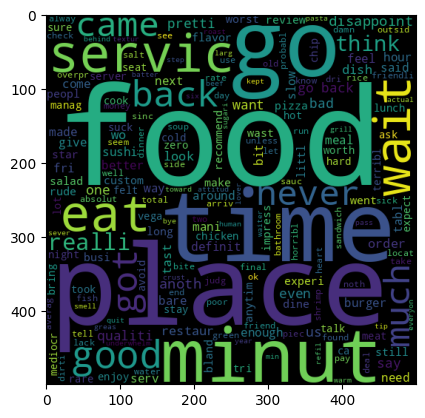

In [34]:
plt.imshow(negative_wc)

In [35]:
positive_wc=wc.generate(df[df['Liked']==1]['transformed_text'].str.cat(sep=""))

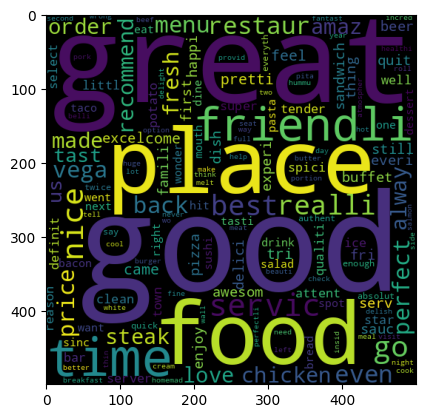

In [36]:
plt.imshow(positive_wc)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(df['transformed_text'],df['Liked'],test_size=0.3,random_state=0,shuffle=True)

In [39]:
x_train

,transformed_text
105,went tigerlilli fantast afternoon
68,got food appar never heard salt batter fish chewi
479,love
399,cook perfect servic impecc
434,absolutley fantast
...,...
835,paid bill tip felt server terribl job
192,order arriv one gyro miss
629,staff alway super friendli help especi cool br...
559,heart place


In [40]:
y_train

,Liked
105,1
68,0
479,1
399,1
434,1
...,...
835,0
192,0
629,1
559,1


# **Building Model Pipeline Tf-idf (Random Forest)**



In [41]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_classifier=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100))])

In [43]:
rf_classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [44]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [45]:
rf_pred=rf_classifier.predict(x_test)

In [46]:
#Confusion Matrix
confusion_matrix(y_test,rf_pred)

array([[132,  11],
       [ 78,  79]])

In [47]:
#Accuracy Score
accuracy_score(y_test,rf_pred)

0.7033333333333334

In [48]:
#Classification Report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.63      0.92      0.75       143
           1       0.88      0.50      0.64       157

    accuracy                           0.70       300
   macro avg       0.75      0.71      0.69       300
weighted avg       0.76      0.70      0.69       300



In [49]:
# Predict a real message
rf_classifier.predict(["food was good"])

array([1])